# Desc

**Goal**
This challenge is significantly easier than all others in this collection:
- no dates
- no tables to join
- no feature engineering required
- the problem is really straightforward.

**Data**
We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).

**Your project is to**
- Predict conversion rate
- Come up with *recommendations* for the product team and the marketing team to improve conversion rate

p6 / p69

**Suggestions**
- Comment the code as much as possible.
- Check the data. Never assume data is right.
- Take-home challenges are usually fairly open ended. Play to your strengths: 
    - this could mean spending more time on visualization, machine learning, product ideas, or business insights depending on your skills.
- Don't make the solution over complicated.
    - when you have to build a machine learning model, don't spend days optimizing its accuracy.
    - Pick a model, explain why you picked that model and use parameters that make sense. 
    - You can then say what you would do if you had 1 more week to optimize it.
- Focus on the business impact that your work could have. 
- If you find anything interesting in the data, by any means show it even if it is not related to the questions.
- Before extracting insights from a model, make sure your model predicts well.

Links:

https://docs.python.org/3/tutorial/inputoutput.html

# Load Dataset

In [1]:
import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h2o vs skearn

https://www.quora.com/Why-would-one-use-H2O-ai-over-scikit-learn-machine-learning-tool

https://seaborn.pydata.org/tutorial/aesthetics.html

In [2]:
# sns.set_context("paper", rc={"font.size":20,"axes.titlesize":22,"axes.labelsize":16})
sns.set_style("darkgrid")
sns.set_context("talk")
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

| Field | Value | Description |
|  ---  | ----- | ----------- |
| country | UK | the user is based in the UK | 
| age | 25 | the user is 25 yr old | 
| new_user | 1 | she created her account during this session | 
| source | Ads | she came to the site by clicking on an ad | 
| total_pages_visited | 1 | she visited just 1 page during that session | 
| converted | 0 | this user did not buy during this session. These are the users whose behavior we want to change! | 

## A few quick observations
- the site is probably a US site, although it does have a large Chinese user base as well
- user base is pretty young
- conversion rate at around 3% is industry standard. It makes sense.
- everything seems to make sense here except for max age 123 yrs!

In [3]:
url = 'https://raw.githubusercontent.com/TimS-ml/DataMining/master/0_TakeHome/0x01_conversion_project.csv'
f = requests.get(url).content
data = pd.read_csv(io.StringIO(f.decode('utf-8')))

# data = pd.read_csv('./conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
# data.country.mode()

In [6]:
for column in data.columns:
    print(data[column].value_counts().nlargest(5))
    print()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

30    14346
28    14341
29    14158
27    14084
26    13931
Name: age, dtype: int64

1    216744
0     99456
Name: new_user, dtype: int64

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

2    43868
3    43829
4    41046
1    40739
5    36308
Name: total_pages_visited, dtype: int64

0    306000
1     10200
Name: converted, dtype: int64



In [7]:
conversion_rate = 10200 / (306000 + 10200)
print('Conversion rate: {:2.2%}'.format(conversion_rate))

Conversion rate: 3.23%


## Unrealistic datas
The safest choice is to remove them

In [8]:
data[data['age'] > 79].head()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [9]:
data = data[data['age'] <= 79]

# EDA

Go through 5 variables one by one

## Visualization of different countries

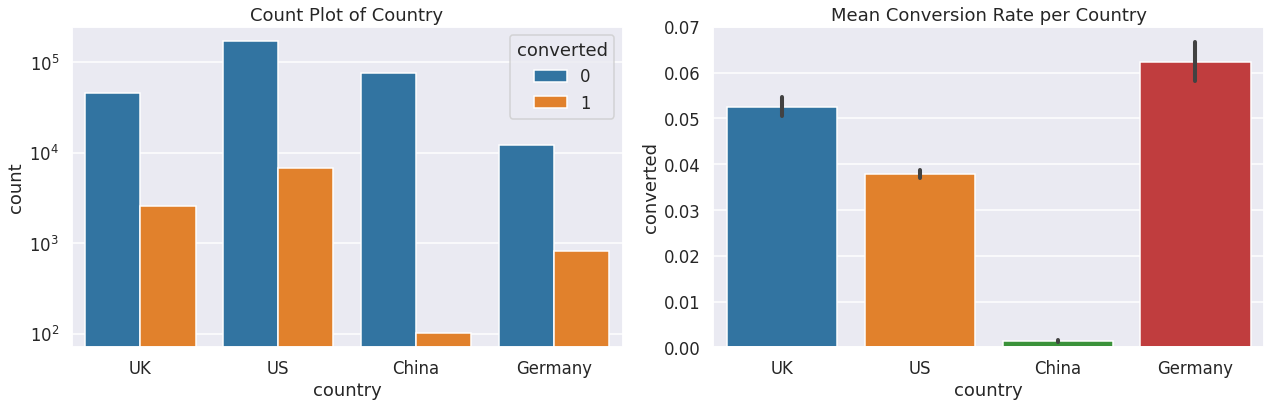

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country')
ax[0].set_yscale('log')

sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country')
plt.tight_layout()

plt.show()

In [11]:
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()
grouped.head()

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


## Visualization of different user types

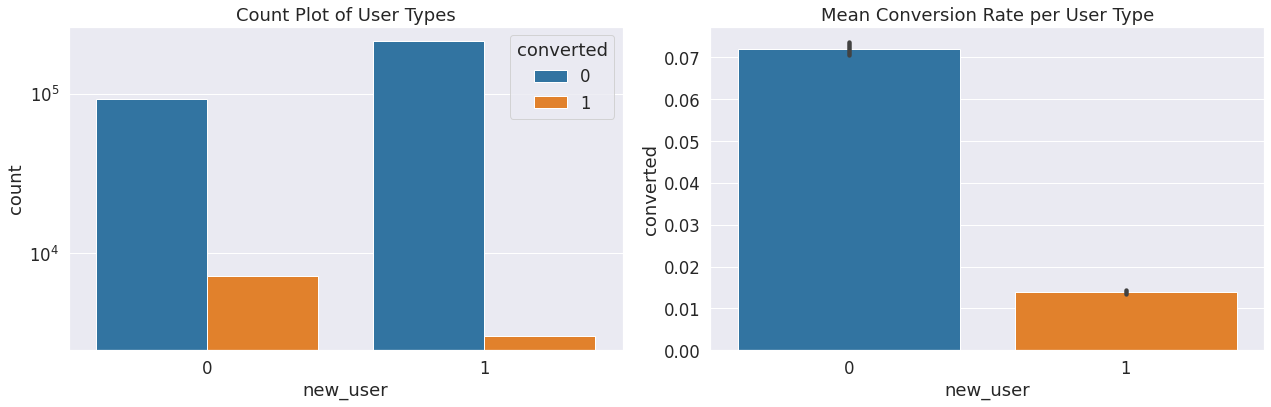

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types')
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type')
plt.tight_layout()

plt.show()

In [13]:
grouped = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()
grouped.head()

,new_user,converted
0,0,0.071983
1,1,0.014021


## Visualization of different sources

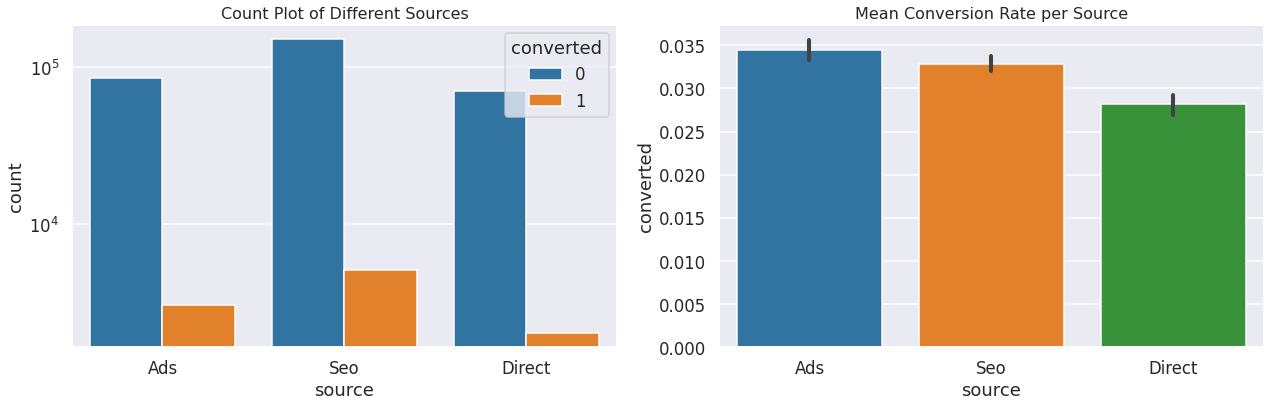

In [22]:
grouped = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

## Visualiztion of Concertion rate vs age

https://seaborn.pydata.org/generated/seaborn.distplot.html

Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. 

It can also fit scipy.stats distributions and plot the estimated PDF over the data.

In [14]:
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
grouped.head()

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


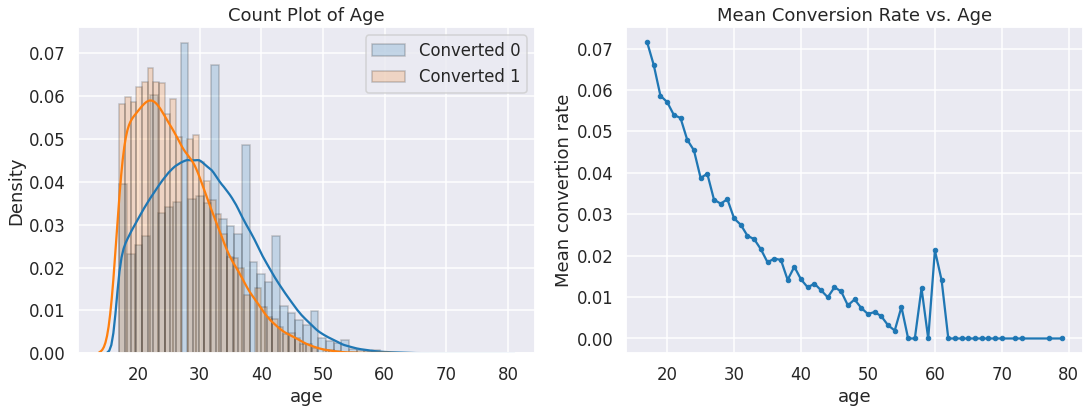

In [15]:
hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age')
ax[0].legend()

ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age')
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

plt.show()

## Visualiztion of Concertion rate vs page visitied

In [16]:
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
grouped.head()

,total_pages_visited,converted
0,1,0.000000
1,2,0.000228
2,3,0.000251
3,4,0.000780
4,5,0.001570


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


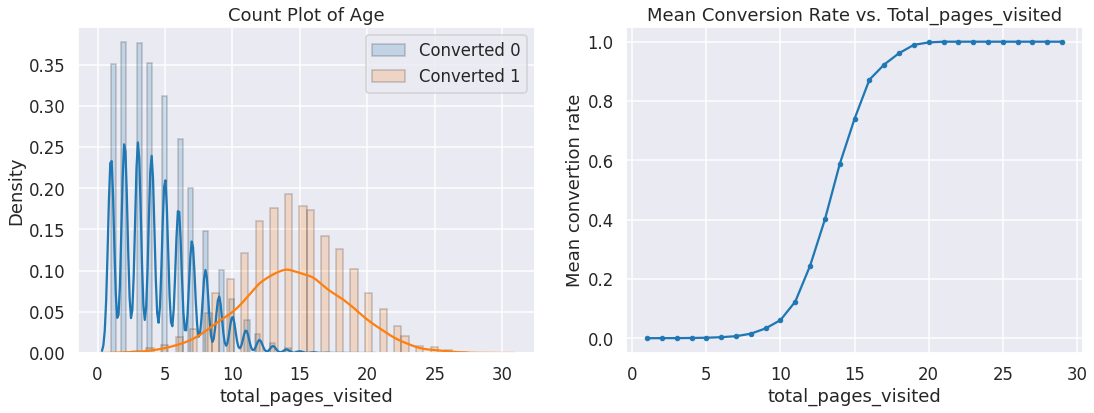

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.distplot(data[data['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age')
ax[0].legend()

ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited')
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

plt.show()

# Machine Learning